In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [4]:
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
sns.set_context("paper")

In [5]:
SMALL_SIZE = 50
MEDIUM_SIZE = 50
BIGGER_SIZE = 150

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
df = pd.read_csv("full_chtol.csv")
#df = pd.read_csv("full_withtol.csv")
df = df.drop(columns=["Unnamed: 0"])

In [7]:
spearmanCorr = df.drop(columns="collectDate").corr(method="spearman")

In [8]:
spcorrs = spearmanCorr[spearmanCorr.index=="adjAshFreeDryMass"]
spcorrs = spcorrs.drop(columns='adjAshFreeDryMass')
spcorrscol = spearmanCorr["adjAshFreeDryMass"]
spcorrscol = pd.DataFrame(spcorrscol)

In [9]:
diverginggnbu = sns.diverging_palette(148,200,86,59,20,n=10)

In [10]:
f, ax = plt.subplots(figsize=(12, 7))
#plt.rc('figure', titlesize=30)  # fontsize of the figure title
mask = np.zeros_like(spearmanCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(spearmanCorr, mask=mask,
                      square = True,
                      linewidths = 0.2,
                      cmap = diverginggnbu)
                      #annot = True,
                      #annot_kws = {"size": 12})#add the column names as labels
#ax.set_yticklabels(spearmanCorr.columns, rotation = 0)
#ax.set_xticklabels(spearmanCorr.columns)
ax.set_title("Correlation matrix heatmap")
f.savefig("figures/chtol/heatmap.png",dpi=350)

In [11]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    #palette = sns.color_palette(palette_name, len(values))
    #palette = sns.diverging_palette(148,200,s=86,l=20,n=len(values))
    palette = sns.diverging_palette(148,200,86,59,20,n=len(values))
    return np.array(palette).take(indices, axis=0)

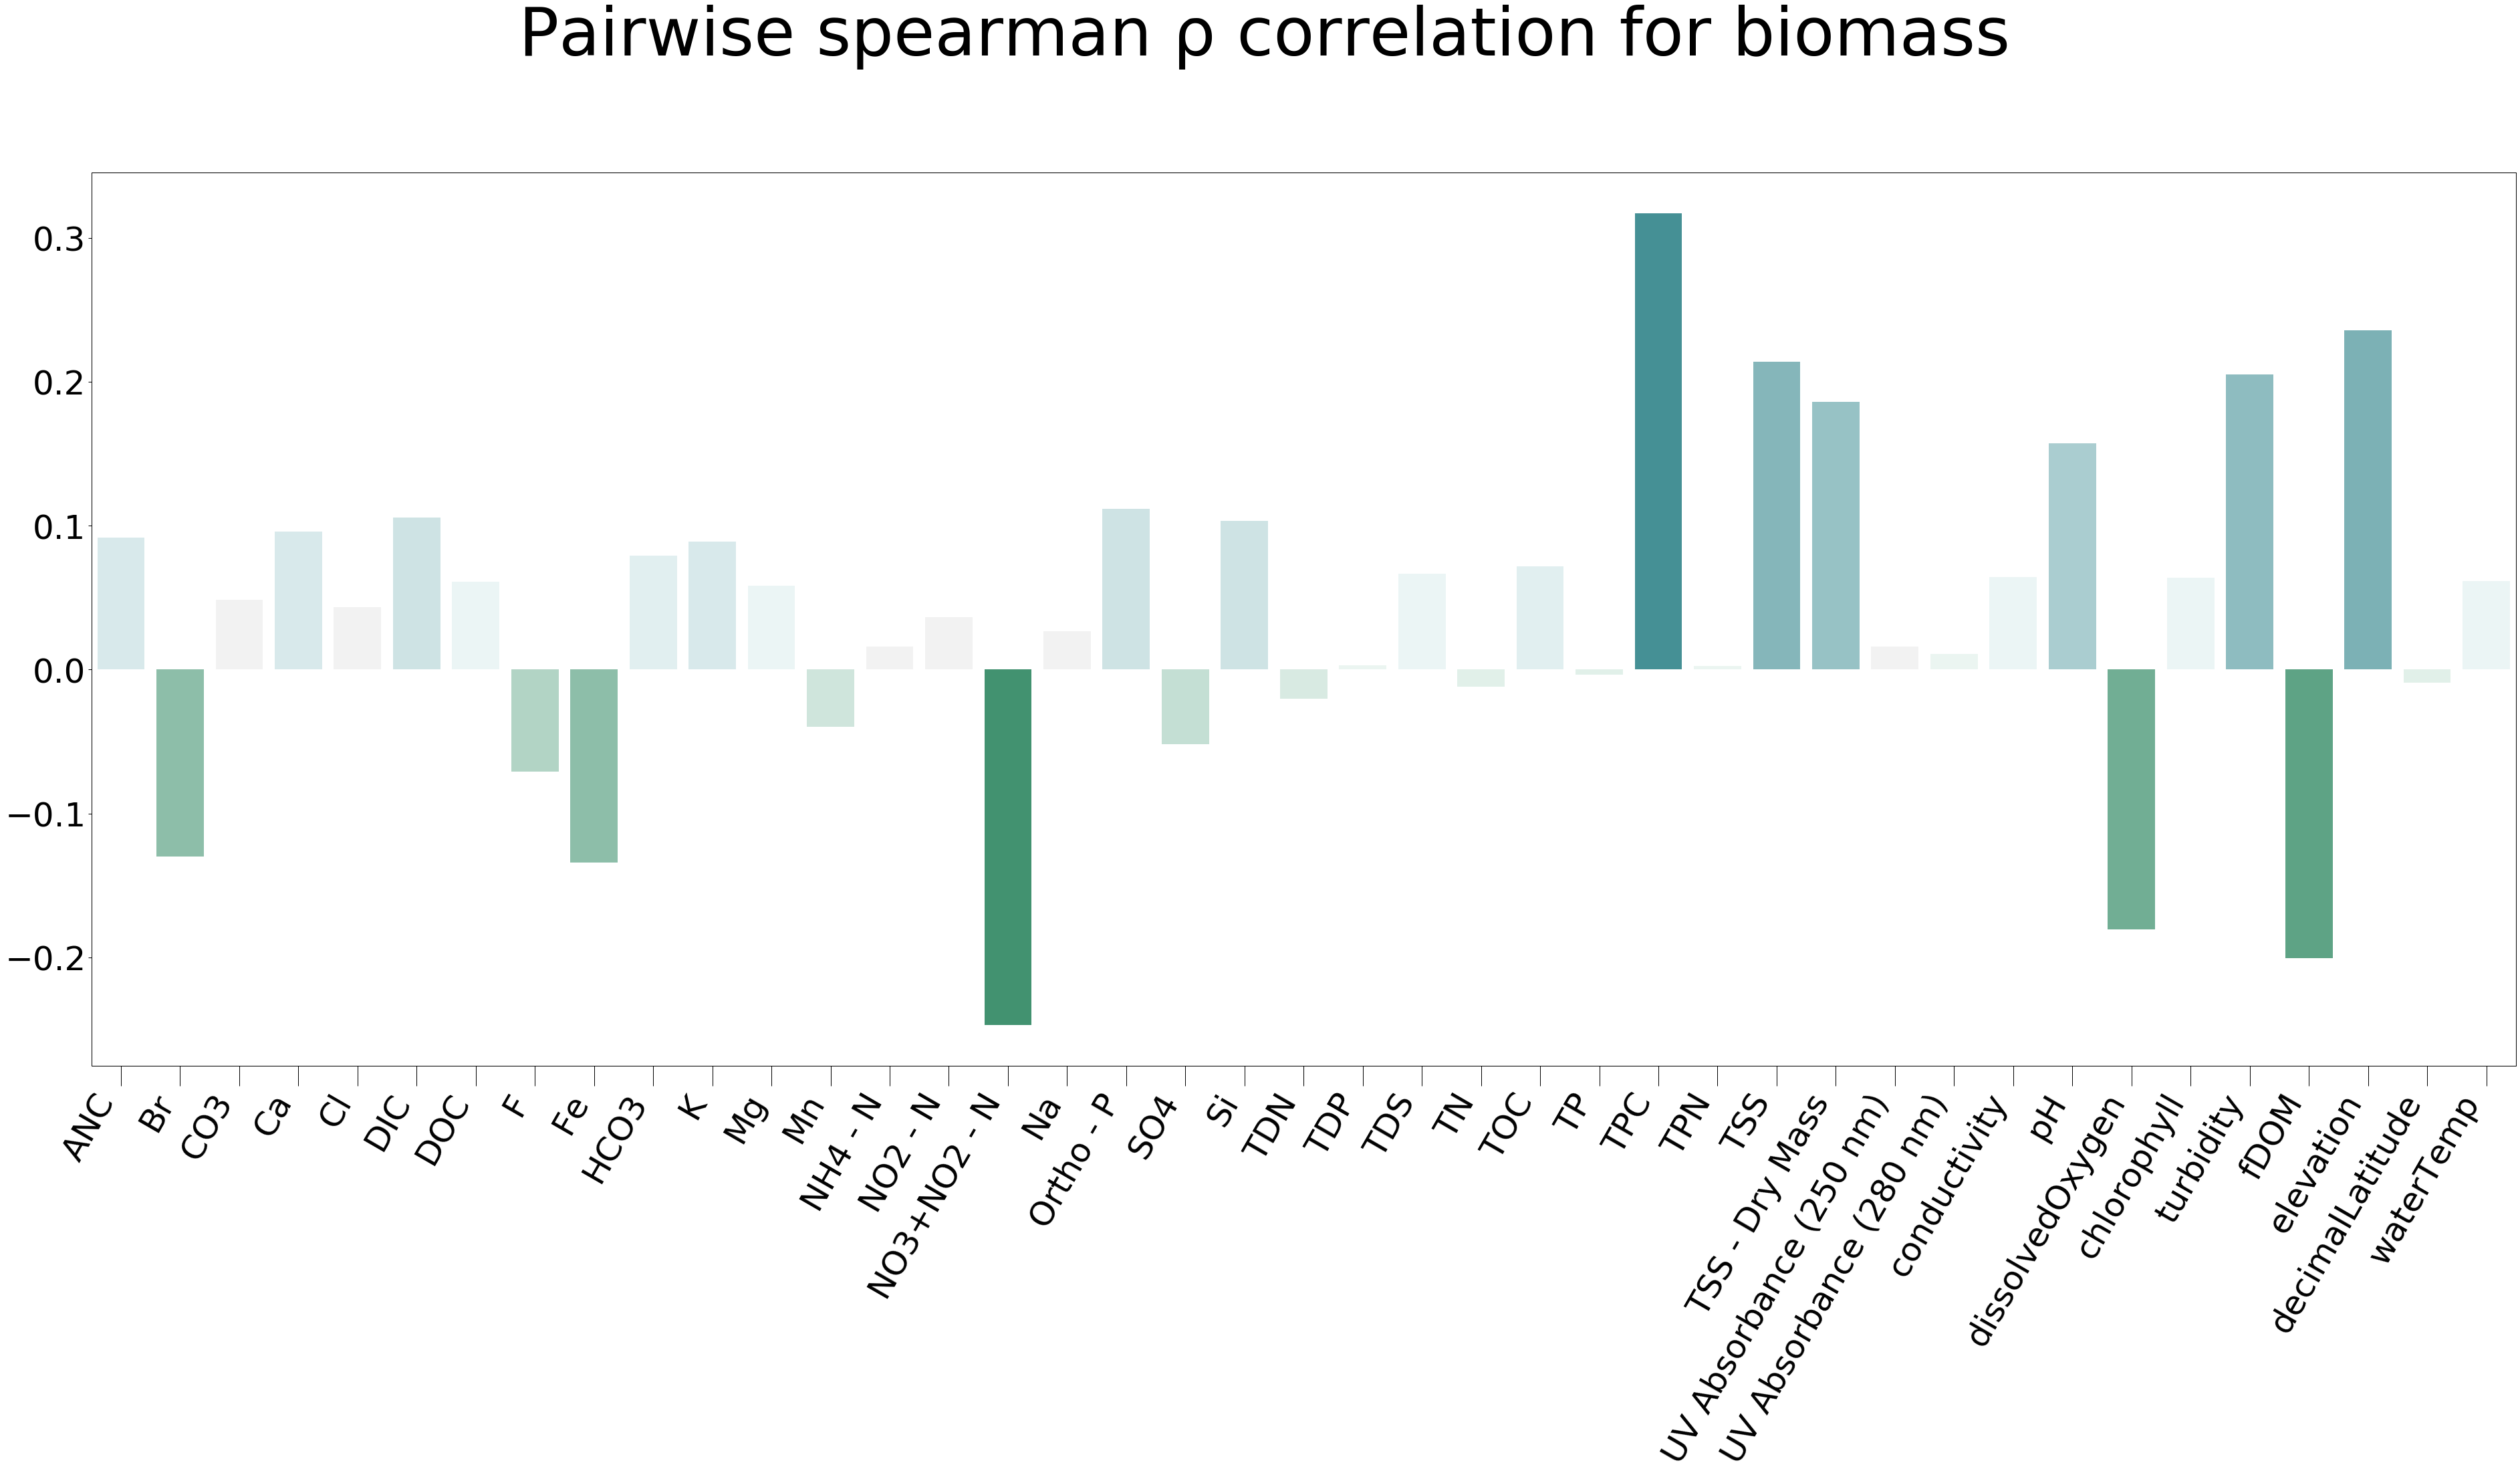

In [12]:
f, ax = plt.subplots(figsize=(65, 35)) 
plt.rc('xtick', labelsize=60)    # fontsize of the tick labels
plt.rc('ytick', labelsize=60)
pal = colors_from_values(spcorrs.values[0],"GnBu")
g = sns.barplot(data=spcorrs,
            palette=pal)
labels = g.get_xticklabels()
g.set_xticklabels(labels,rotation=60,horizontalalignment='right')
f.suptitle("Pairwise spearman ρ correlation for biomass",fontsize=100)
g.tick_params(axis='x', length=30)
plt.gcf().subplots_adjust(bottom=0.35)
f.savefig("figures/chtol/barplot_spearman.png",bbox="tight")

In [13]:
topval = df.drop(columns="collectDate")

In [14]:
signif = pd.DataFrame({"variable":[],"spearman corr":[],"p value":[]})
for i in range(2,len(list(topval))):
    r,p = stats.spearmanr(topval['adjAshFreeDryMass'],topval[list(topval)[i]])
    if p<0.1:
        signif = signif.append( {"variable":list(topval)[i] , "spearman corr":r, "p value":p} , ignore_index=True)

In [15]:
df[signif['variable'].append(pd.Series(["adjAshFreeDryMass","siteID"]))].to_csv("signifCHTOL")